<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Densely_Connected_Convolutional_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Densely Connected Convolutional Networks**

논문 링크: https://arxiv.org/abs/1608.06993

DenseNet은 ResNet의 **shortcut connection**에 초점을 맞췄다. 아이디어가 참신하고 재밌는데 바로 이전 layer들의 feature map을 계속 다음 layer에 연결하는 방식이다.

## **DenseNet 구조**

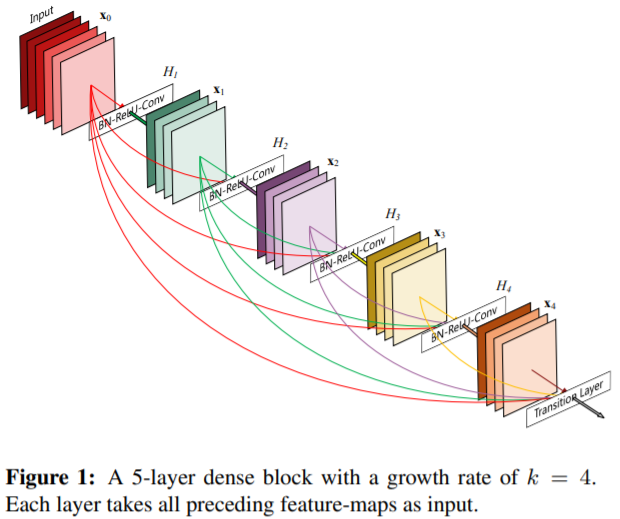

위의 그림 Figure 1을 보면 쉽게 이해할 수 있다. 다만 ResNet과의 차이점이 있는데 **ResNet은 feature map을 더하는 것이었다면 DenseNet은 feature map끼리 concatenation**을 시키는 것이다.

이렇게 연결을 하면 여러가지의 장점을 가질 수 있다. 먼저, 중복된 feature map을 다시 배울 필요가 없으므로 parameter가 절약된다. ResNet은 identity transformation으로 정보를 보존하지만, 이러한 information들이 train 과정에서 random하게 drop될 수 있다.

반면 DenseNet은 feature map이 그대로 보존이 되면서, feature map의 작은 집합들을 layer에 더해주기 때문에 network에 더해지는 정보들을 명확하게 구분하면서 정보를 보존한다. 또한, loss function과 input signal로부터 gradient에 direct하게 접근할 수 있기 때문에 network의 전체 flow와 gradient를 개선할 수 있으며 추가적으로 regularization 효과도 있어 overfitting을 방지한다.

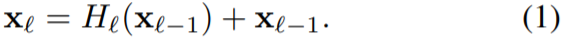

기존 ResNet의 identity mapping 방식이 위의 식과 같았다면,

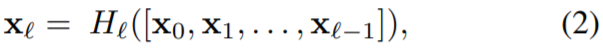

DenseNet은 위의 식과 같다. 즉, ℓ번째에 ℓ전까지의 layer를 concat해주는 것이다.

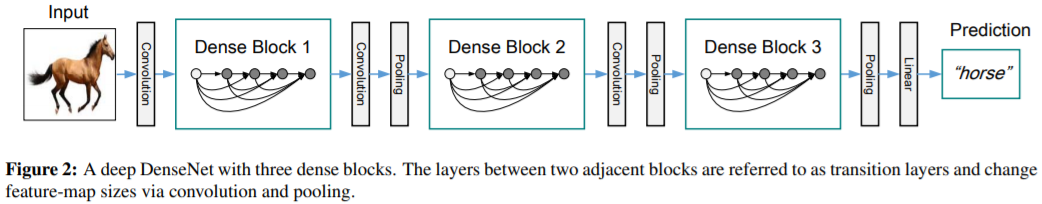

channel을 concat하므로 feature map의 size가 달라지면 안된다. 따라서 위의 그림 Figure 2와 같이 Dense Block에서 본 논문의 아이디어를 적용하고 중간 중간에 Transition layer(Convolution과 Pooling)로 down-sampling을 진행한다.

또한, 앞서 말했듯이 DenseNet의 경우는 channel을 concat하는 구조다보니 자칫 feature map의 channel이 너무 많아질 수 있다. 따라서 DenseNet은 각 layer에 있는 feature map의 channel 수를 굉장히 작은 값을 가지게 하며, 이때 **각 layer에 있는 feature map의 channel 개수를 growth rate k**라 한다.

ResNet에서 bottleneck 구조를 사용하였듯이 DenseNet도 bottleneck 구조를 사용하였는데, 3x3 convolution 전에 1x1 convolution 연산을 통해 4 x growth rate 개의 feature map을 만들고 그 뒤에 3x3 convolution을 통해 growth rate 개의 feature map으로 줄여준다.

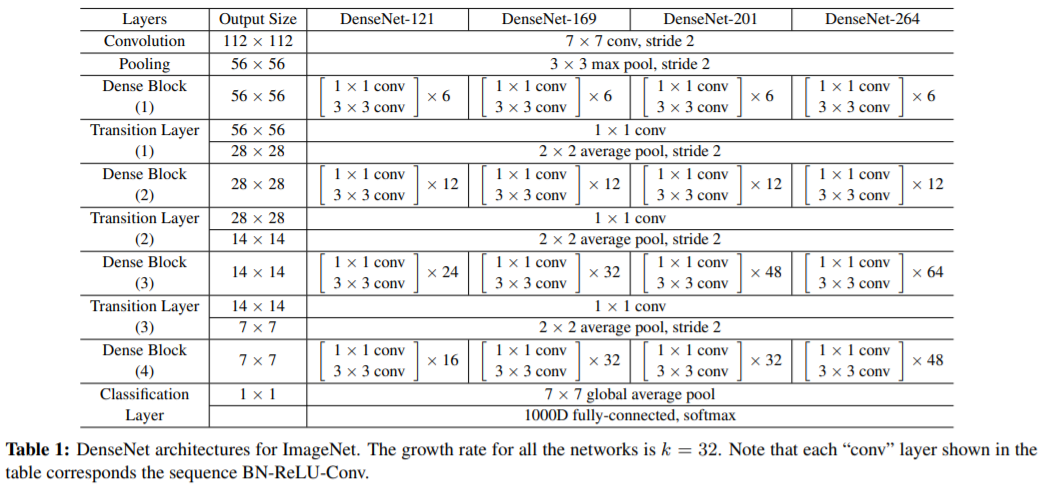

위의 표 Table 1에서는 ImageNet의 224x224 input image에 대한 DenseNet-121, DenseNet-169, DenseNet-201, DenseNet-264의 자세한 구조에 대해 나와있다.

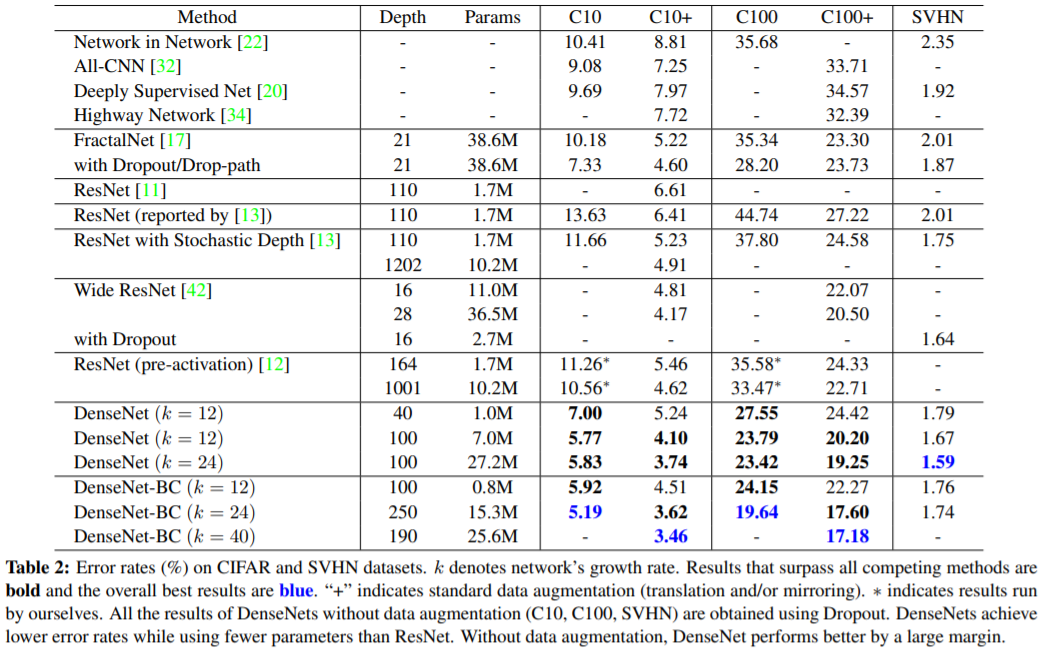

위의 표 Table 2는 DenseNet의 구조에 따른 성능과 기존 모델들의 성능을 CIFAR-10, CIFAR-100, SVHN에 대해 비교한 것이다. 확실히 ResNet, WideResNet 등에 비해 성능이 우수하다. DenseNet-BC도 250-layer부터는 overfitting 때문에 성능이 더 향상되지 않는다.

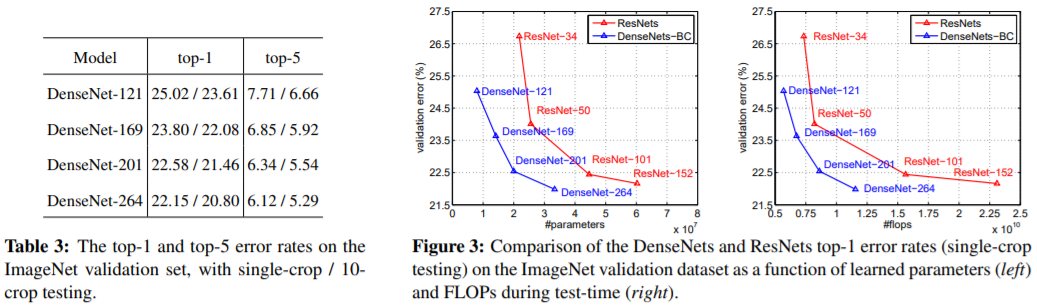

위의 표 Table 3은 ImageNet dataset에 top-1 error와 top-5 error를 보여준다. 위의 그림 Figure 3은 top-1 error를 그래프로 보여준 것이다. flops와 parameters도 DenseNet이 ResNet보다 더 적으면서 성능은 더 좋은 것을 알 수 있다.

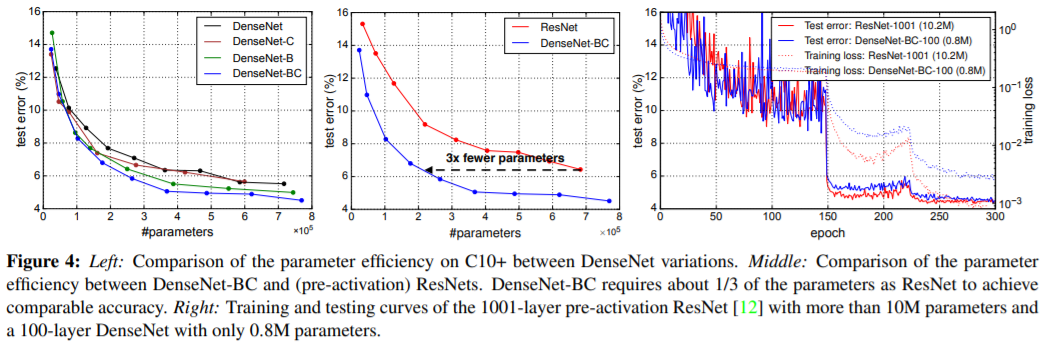

위의 그림 Figure 4에서 왼쪽의 표는 DenseNet의 변형 model들의 성능을 비교한 것이고, 가운데 표와 오른쪽 표는 ResNet과 DenseNet-BC의 성능을 비교한 것이다. (-B는 bottleneck 구조를 사용한 것이고, -C는 compression factor θ가 1보다 작을 경우다. 논문에선 θ = 0.5)